In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

%matplotlib inline

In [2]:
URL="https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df_wine = pd.read_csv(URL, header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
X,y=df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Standardize the data
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [4]:
cov_mat=np.cov(X_train_std.T)
eigen_vals,eigen_vecs=np.linalg.eigh(cov_mat)
print('Eigenvalues \ n%s' %eigen_vals)
print('Eigenvectors \ n%s' %eigen_vecs)

Eigenvalues \ n[0.09935613 0.17349645 0.23096439 0.25665489 0.28504118 0.34681782
 0.46974164 0.59663887 0.92313257 0.99327678 1.5276711  2.45913372
 4.74376552]
Eigenvectors \ n[[ 0.02053618  0.19383723 -0.2924713  -0.31043682 -0.22611951 -0.51726172
   0.24715174 -0.12108437 -0.32221478 -0.04624624  0.12605367  0.49571937
  -0.13443023]
 [-0.10406031 -0.08039695  0.2717176   0.20011018 -0.038156    0.01884124
   0.60464068  0.16951285  0.18146701 -0.56428416 -0.08398481  0.21988534
   0.25680248]
 [ 0.18793854  0.04789087 -0.38128856  0.41999396  0.08630281  0.17894583
   0.10664983 -0.19927928 -0.10436437  0.14966332 -0.67171617  0.25579499
   0.0113463 ]
 [-0.12520142  0.04047926  0.37269425 -0.31581767  0.10543504 -0.48861364
  -0.18701632 -0.17513522  0.13809265  0.00919969 -0.58764561 -0.09630359
   0.23405337]
 [-0.07224125 -0.01601375  0.02016848 -0.2613263  -0.21350905  0.13462195
   0.23196898  0.31914517  0.56500632  0.52679936 -0.11734551  0.26616487
  -0.15840049]
 [ 0.40

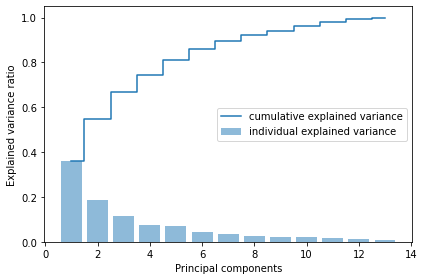

In [5]:
tot=sum(eigen_vals)
var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
plt.bar(range(1,14),var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(1,14),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [6]:
# make a list of (eigenvalue,eigenvector) tuples
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# sort the (eigenvalue,eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k:k[0],reverse=True)
eigen_pairs

[(4.743765516624771,
  array([-0.13443023,  0.25680248,  0.0113463 ,  0.23405337, -0.15840049,
         -0.39194918, -0.41607649,  0.27871336, -0.33129255,  0.11383282,
         -0.29726413, -0.38054255, -0.27507157])),
 (2.459133719056184,
  array([ 0.49571937,  0.21988534,  0.25579499, -0.09630359,  0.26616487,
          0.06381624,  0.00971648,  0.0275335 ,  0.0073265 ,  0.54829944,
         -0.27616688, -0.15580423,  0.39269514])),
 (1.5276711043996305,
  array([ 0.12605367, -0.08398481, -0.67171617, -0.58764561, -0.11734551,
         -0.15444497, -0.17404674, -0.24065975, -0.07724329,  0.06523068,
         -0.08675172, -0.17043147,  0.08888266])),
 (0.9932767812225789,
  array([-0.04624624, -0.56428416,  0.14966332,  0.00919969,  0.52679936,
         -0.26095189, -0.20649548, -0.02063026, -0.315633  , -0.0475105 ,
          0.30623963, -0.20186583,  0.17851478])),
 (0.9231325659686086,
  array([-0.32221478,  0.18146701, -0.10436437,  0.13809265,  0.56500632,
         -0.02330903, 

In [7]:
w=np.hstack((eigen_pairs[0][1][:,np.newaxis],
            eigen_pairs[1][1][:,np.newaxis]))
print('Matrix W:\n',w) 

Matrix W:
 [[-0.13443023  0.49571937]
 [ 0.25680248  0.21988534]
 [ 0.0113463   0.25579499]
 [ 0.23405337 -0.09630359]
 [-0.15840049  0.26616487]
 [-0.39194918  0.06381624]
 [-0.41607649  0.00971648]
 [ 0.27871336  0.0275335 ]
 [-0.33129255  0.0073265 ]
 [ 0.11383282  0.54829944]
 [-0.29726413 -0.27616688]
 [-0.38054255 -0.15580423]
 [-0.27507157  0.39269514]]


In [8]:
X_train_std[0].dot(w)

array([3.00694856, 0.44098187])

In [9]:
X_train_pca=X_train_std.dot(w)

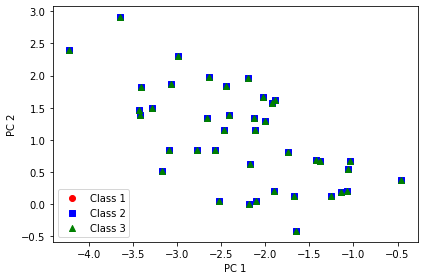

In [10]:
colors=['r','b','g']
markers=['o','s','^']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==1,0],
                X_train_pca[y_train==1,1],
                c=c,label=f'Class {l}',marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [11]:
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.2):
    markers=('o','s','^','v','<')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
    np.arange(x2_min,x2_max,resolution))
    lab=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    lab=lab.reshape(xx1.shape)
    plt.contour(xx1,xx2,lab,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],
                    alpha=0.8,c=colors[idx],
                    marker=markers[idx],label=f'Class {cl}',
                    edgecolor='black')  

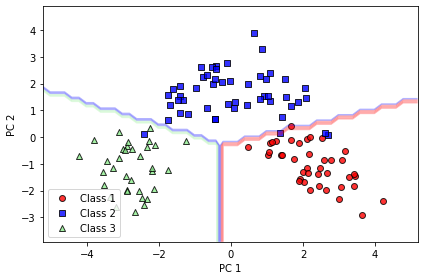

In [12]:
pca=PCA(n_components=2)
lr=LogisticRegression(multi_class='ovr',random_state=42,solver='lbfgs')
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
lr.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

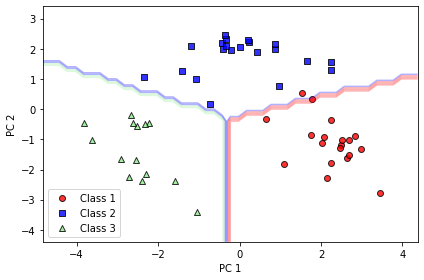

In [13]:
plot_decision_regions(X_test_pca,y_test,classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [14]:
pca=PCA(n_components=None)
X_train_pca=pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36196226, 0.18763862, 0.11656548, 0.07578973, 0.07043753,
       0.04552517, 0.03584257, 0.02646315, 0.02174942, 0.01958347,
       0.01762321, 0.01323825, 0.00758114])

In [15]:
loadings=eigen_vecs*np.sqrt(eigen_vals)

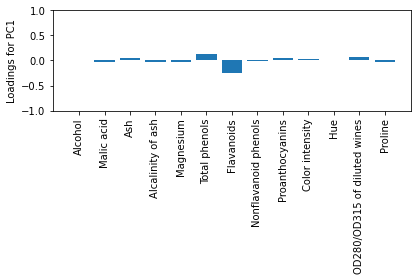

In [16]:
fig,ax=plt.subplots()
ax.bar(range(13),loadings[:,0],align='center')
ax.set_ylabel('Loadings for PC1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:],rotation=90)
ax.set_ylim([-1,1])
plt.tight_layout()
plt.show()    


In [17]:
sklearn_loadings=pca.components_.T*np.sqrt(pca.explained_variance_)

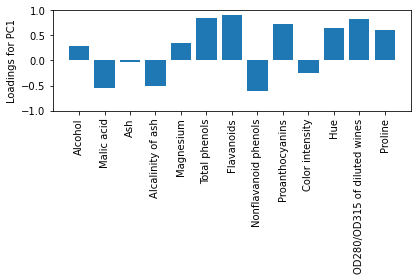

In [18]:
fig,ax=plt.subplots()
ax.bar(range(13),sklearn_loadings[:,0],align='center')
ax.set_ylabel('Loadings for PC1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:],rotation=90)
ax.set_ylim([-1,1])
plt.tight_layout()
plt.show()

### LDA


In [19]:
np.set_printoptions(precision=4)
mean_vecs=[]
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis=0))
    print(f'MV {label}:{mean_vecs[label-1]}n')

MV 1:[ 0.939  -0.3671  0.3042 -0.7939  0.4489  0.8891  0.9656 -0.4912  0.558
  0.2169  0.4507  0.7705  1.1707]n
MV 2:[-0.8597 -0.3294 -0.3959  0.298  -0.3083 -0.0496  0.0614 -0.0301  0.1509
 -0.867   0.4261  0.2809 -0.6949]n
MV 3:[ 0.1596  0.9162  0.2243  0.4958 -0.0747 -0.9731 -1.2264  0.6222 -0.8784
  1.0198 -1.1568 -1.3195 -0.3554]n


### Scatter matrix

In [20]:
d=13 # number of features
S_W=np.zeros((d,d))
for label,mv in zip(range(1,4),mean_vecs):
    class_scatter=np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        row,mv=row.reshape(d,1),mv.reshape(d,1)
        class_scatter+=(row-mv).dot((row-mv).T)

    S_W+=class_scatter

print(f'Within-class scatter matrix: {S_W.shape}n')


Within-class scatter matrix: (13, 13)n


In [21]:
print(f'Class label distribution: {np.bincount(y_train)[1:]}n')

Class label distribution: [40 50 34]n


In [22]:
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter

print(f'Within-class scatter matrix: {S_W.shape}n')


Within-class scatter matrix: (13, 13)n


In [23]:
mean_overall=np.mean(X_train_std,axis=0)
mean_overall=mean_overall.reshape(d,1)

d=13
S_B=np.zeros((d,d))
for i,mean_vec in enumerate(mean_vecs):
    n=X_train[y_train==i+1,:].shape[0]
    mean_vec=mean_vec.reshape(d,1)
    S_B+=n*(mean_vec-mean_overall).dot((mean_vec-mean_overall).T)

print(f'Between-class scatter matrix: {S_B.shape}n')


Between-class scatter matrix: (13, 13)n


In [24]:
eigen_vals,eigen_vecs=np.linalg.eigh(np.linalg.inv(S_W).dot(S_B))

In [25]:
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs=sorted(eigen_pairs,key=lambda k:k[0],reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

501.9516910517615
211.81131238223043
167.17713240591445
135.16716815337912
99.57137580694392
60.34148926247881
35.798205659318654
29.401190564734293
19.680616576573787
15.63590299137148
12.195093806040123
3.483448245895895
1.150912831721352


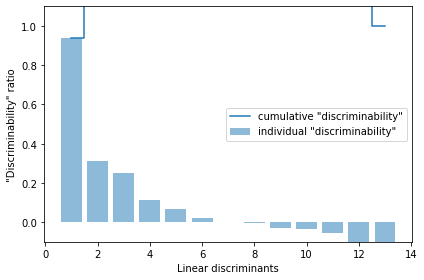

In [26]:
tot=sum(eigen_vals.real)
discr=[(i/tot) for i in sorted(eigen_vals.real,reverse=True)]
cum_discr=np.cumsum(discr)

plt.bar(range(1,14),discr,alpha=0.5,align='center',label='individual "discriminability"')

plt.step(range(1,14),cum_discr,where='mid',label='cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1,1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [27]:
w=np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real))
print('Matrix W:\n',w)

Matrix W:
 [[-0.1374 -0.1118]
 [ 0.2433  0.3658]
 [-0.0169  0.0299]
 [ 0.2543  0.2586]
 [-0.0751 -0.1449]
 [-0.2827 -0.6541]
 [-0.5976  0.2806]
 [ 0.0593  0.1946]
 [-0.0987 -0.2224]
 [ 0.2573 -0.2338]
 [-0.1639 -0.0716]
 [-0.4174  0.2146]
 [-0.3656  0.2551]]


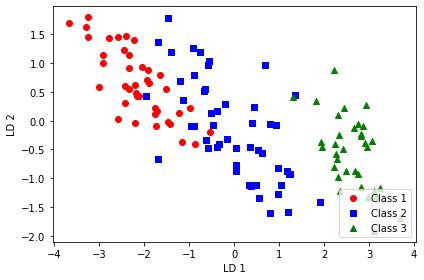

In [28]:
X_train_lda=X_train_std.dot(w)
colors=['r','b','g']
markers=['o','s','^']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_lda[y_train==l,0],X_train_lda[y_train==l,1]*(-1),c=c,label=f'Class {l}',marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [29]:
lda=LDA(n_components=2)
X_train_lda=lda.fit_transform(X_train_std,y_train)

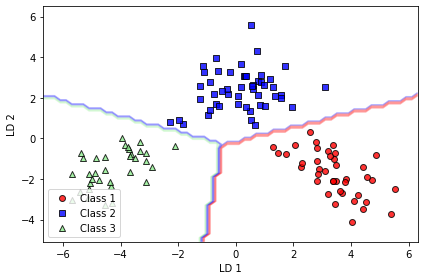

In [30]:
lr=LogisticRegression(multi_class='ovr',random_state=42,solver='lbfgs')
lr=lr.fit(X_train_lda,y_train)
plot_decision_regions(X_train_lda,y_train,classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

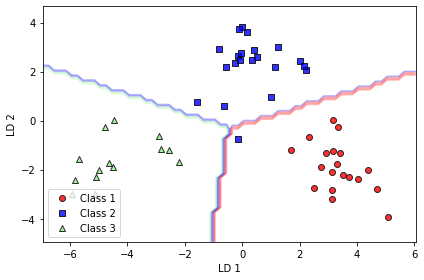

In [31]:
X_test_lda=lda.transform(X_test_std)
plot_decision_regions(X_test_lda,y_test,classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
